In [1]:
#%matplotlib ipympl

import matplotlib.pyplot as plt
import numpy as np
import sys
from datetime import datetime

sys.path.append('/home/bart/meteo/models/LS2D')
import ls2d

"""
Global settings
"""
ls2d_data_path = '/home/scratch1/bart/LS2D_EWED'

In [2]:
"""
Class to download / parse a single wild fire case.
"""

class Fire_case:
    def __init__(self, name, lon, lat, start, end):
        self.name = name

        self.lon = lon
        self.lat = lat

        self.start = datetime.fromisoformat(start)
        self.end = datetime.fromisoformat(end)

        self.ls2d_settings = {
            'central_lat' : self.lat,
            'central_lon' : self.lon,
            'area_size'   : 1,
            'case_name'   : self.name,
            'era5_path'   : ls2d_data_path,
            'era5_expver' : 1,
            'start_date'  : self.start,
            'end_date'    : self.end,
            'write_log'   : False,
            'data_source' : 'CDS'}


    def download(self):
        """
        Download required ERA5 data using (LS)2D.
        """
        ls2d.download_era5(self.ls2d_settings, exit_when_waiting=False)


    def read(self):
        """
        Read ERA5 data with (LS)2D, and calculate large-scale forcings.
        """
        _era5 = ls2d.Read_era5(self.ls2d_settings)
        _era5.calculate_forcings(n_av=1, method='2nd')

        # Interpolate ERA5 to fixed height grid:
        z = np.arange(10., 5000., 20.)
        self.era5 = _era5.get_les_input(z)


    def derive_mxl_input(self):
        """
        Derive required mixed-layer model parameters from ERA5.
        """
        pass


    def plot(self):
        """
        Plot ERA5 initial profiles.
        """

        plt.figure(figsize=(8,7), layout='tight')
        plt.suptitle(rf'$\bf{{{self.name}}}$ ({self.lon}$^o$E, {self.lat}$^o$N): {self.start}')

        plt.subplot(221)
        plt.plot(self.era5.thl[0,:], self.era5.z, label='ERA5')
        plt.xlabel(r'$\theta_\mathrm{l}$ (K)')
        plt.ylabel(r'$z$ (m)')
        plt.legend()

        plt.subplot(222)
        plt.plot(self.era5.qt[0,:]*1e3, self.era5.z)
        plt.xlabel(r'$q_\mathrm{t}$ (g kg$^{-1}$)')

        plt.subplot(223)
        plt.plot(self.era5.u[0,:], self.era5.z, label=r'$u$')
        plt.plot(self.era5.ug[0,:], self.era5.z, ':', color='C0', label=r'$u_\mathrm{g}$')
        plt.xlabel(r'$u$ (m s$^{-1}$)')
        plt.ylabel(r'$z$ (m)')
        plt.legend()

        plt.subplot(224)
        plt.plot(self.era5.v[0,:], self.era5.z, label=r'$v$')
        plt.plot(self.era5.vg[0,:], self.era5.z, ':', color='C0', label=r'$v_\mathrm{g}$')
        plt.xlabel(r'$v$ (m s$^{-1}$)')
        plt.legend()

In [3]:
"""
Different cases from EWED platform.
Currently incomplete, the website has some inconsistencies in the dates...
"""
# NOTE: start times are rounded down to the nearest full hour for (LS)2D.

cases = {}
cases['tortosa'] = Fire_case(name='tortosa', lon=0.593460, lat=40.823570, start='2024-05-28T08:00:00', end='2024-05-28T23:00:00')
cases['katsimidi'] = Fire_case(name='katsimidi', lon=23.791808, lat=38.183321, start='2024-06-29T11:00:00', end='2024-06-29T23:00:00')
cases['mequinensa'] = Fire_case(name='mequinensa', lon=0.315670, lat=41.379853, start='2024-07-07T15:00:00', end='2024-07-07T23:00:00')
cases['vilanova-da-meia'] = Fire_case(name='vilanova-da-meia', lon=1.072223, lat=41.947036, start='2024-08-09T13:00:00', end='2024-08-09T23:00:00')
cases['varnavas'] = Fire_case(name='varnavas', lon=23.924421, lat=38.237959, start='2024-08-11T12:00:00', end='2024-08-11T23:00:00')
cases['la-figuera'] = Fire_case(name='la-figuera', lon=0.741027, lat=41.214060, start='2024-07-28T13:00:00', end='2024-07-28T23:00:00')
cases['orista'] = Fire_case(name='orista', lon=2.052567, lat=41.902943, start='2023-10-05T10:00:00', end='2023-10-05T23:00:00')
cases['pont-de-vilomara'] = Fire_case(name='pont-de-vilomara', lon=1.901683, lat=41.686460, start='2022-07-07T11:00:00', end='2022-07-07T23:00:00')

In [4]:
"""
Download ERA5 data.
"""
for name, case in cases.items():
    case.download()
    case.read()

[2025/03/20 07:39:44] [(LS)²D] [INFO] Downloading ERA5 for period: 2024-05-28 08:00:00 to 2024-05-28 23:00:00'
[2025/03/20 07:39:44] [(LS)²D] [DEBUG] Found 2024-05-28 00:00:00 - model_an local'
[2025/03/20 07:39:44] [(LS)²D] [DEBUG] Found 2024-05-28 00:00:00 - pressure_an local'
[2025/03/20 07:39:44] [(LS)²D] [DEBUG] Found 2024-05-28 00:00:00 - surface_an local'
[2025/03/20 07:39:44] [(LS)²D] [INFO] Reading ERA5 from 2024-05-28 08:00:00 to 2024-05-28 23:00:00'
[2025/03/20 07:39:44] [(LS)²D] [DEBUG] Calculating large-scale forcings'
[2025/03/20 07:39:44] [(LS)²D] [DEBUG] Using nearest lat/lon = 40.82/0.59 (requested = 40.82/0.59), distance ~= 0.0 km'
[2025/03/20 07:39:44] [(LS)²D] [DEBUG] Averaging ERA5 over a 0.75°×0.75° spatial area.'
[2025/03/20 07:39:44] [(LS)²D] [DEBUG] Selected grid point is over land.'
[2025/03/20 07:39:44] [(LS)²D] [INFO] Downloading ERA5 for period: 2024-06-29 11:00:00 to 2024-06-29 23:00:00'
[2025/03/20 07:39:44] [(LS)²D] [DEBUG] Found 2024-06-29 00:00:00 - mo

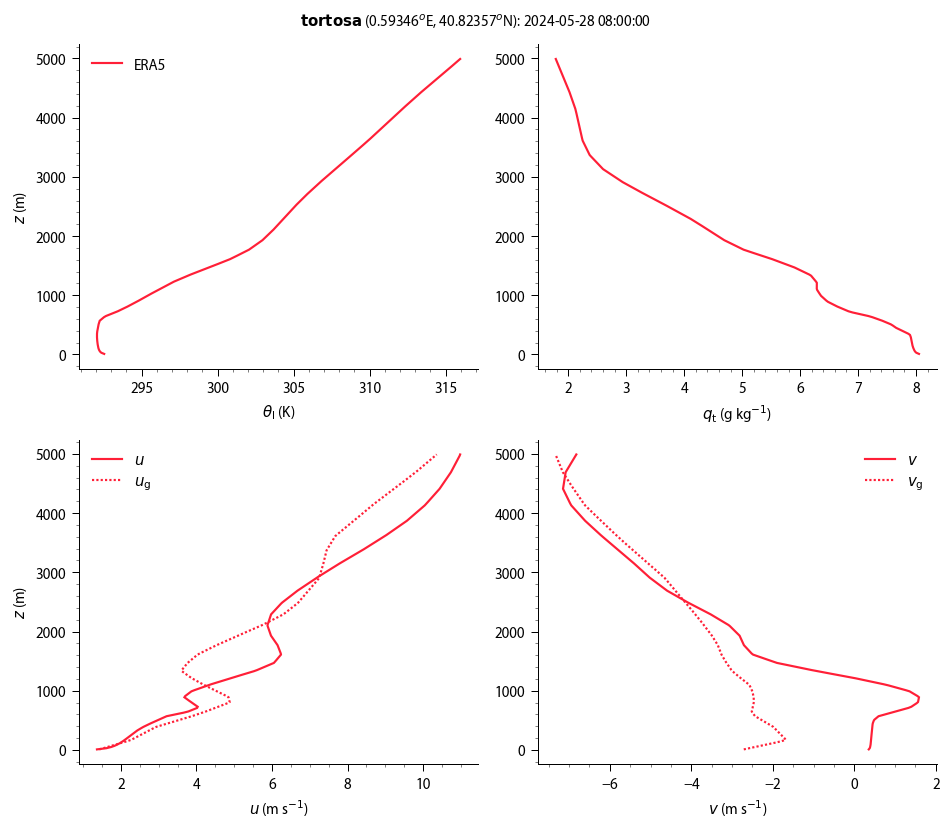

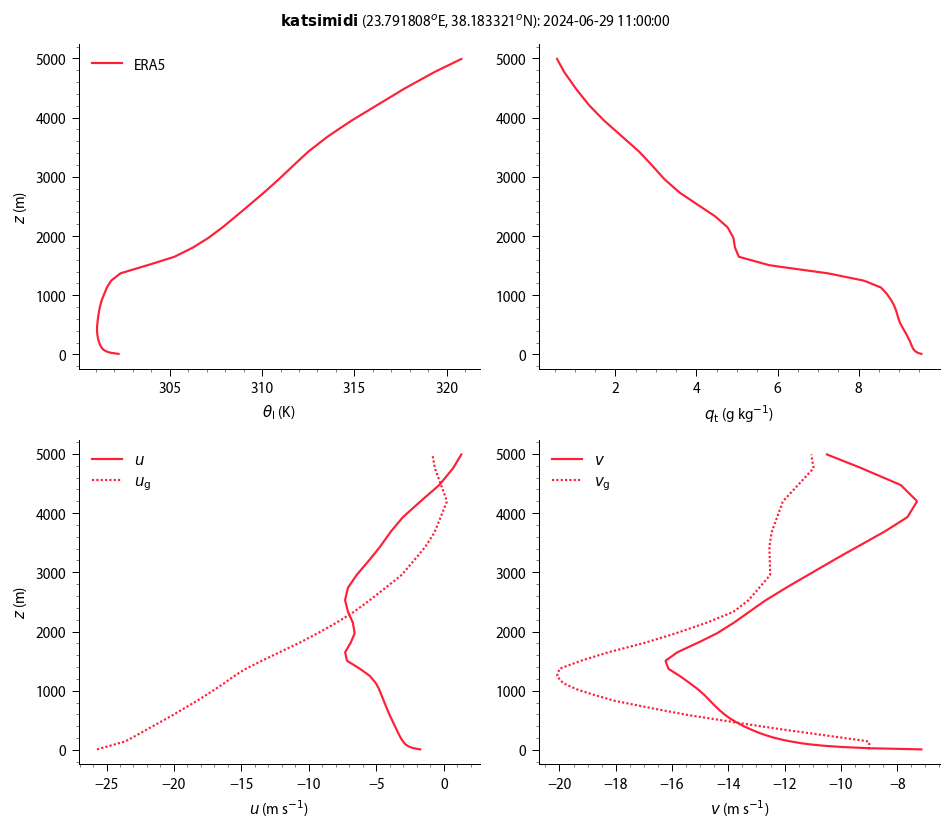

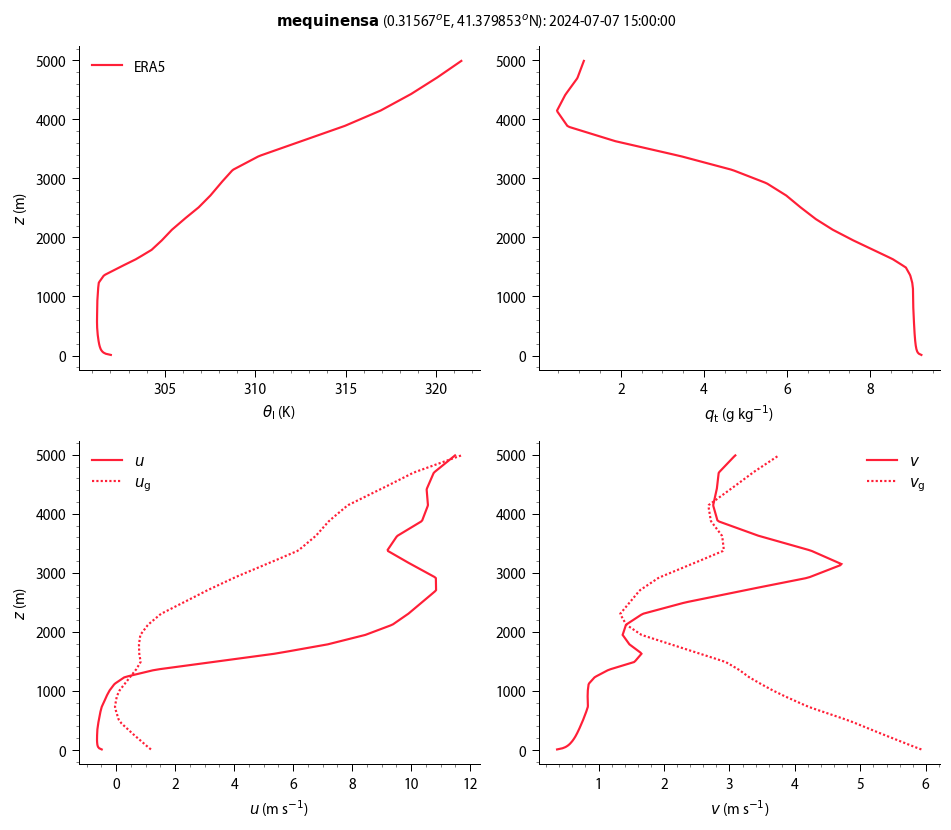

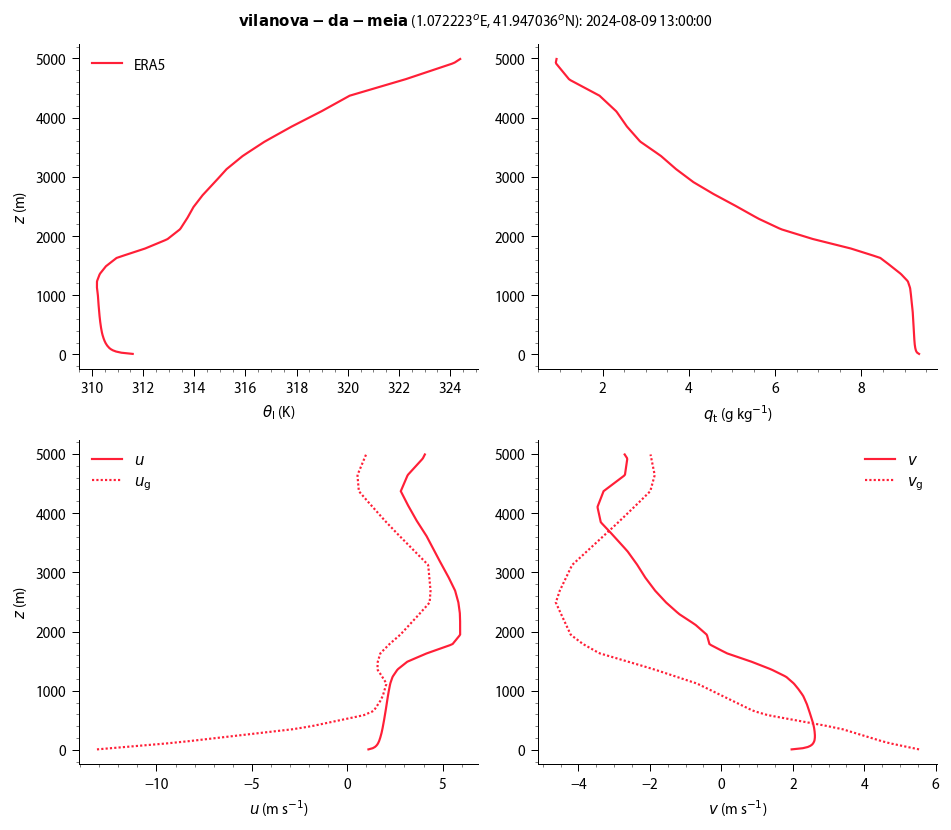

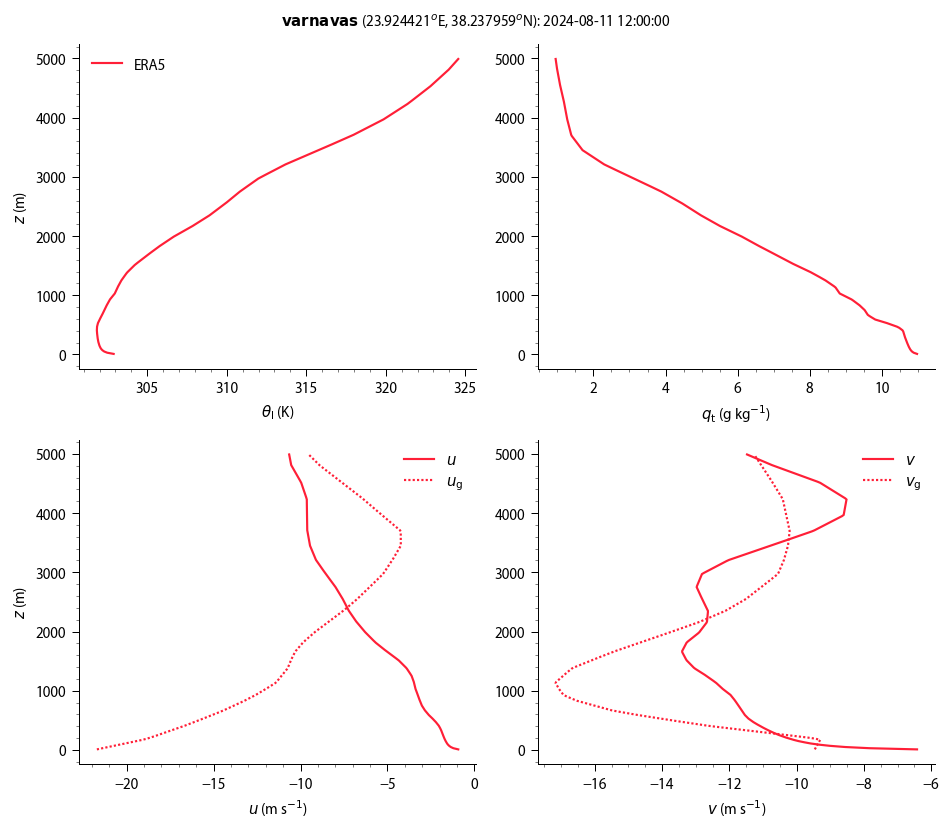

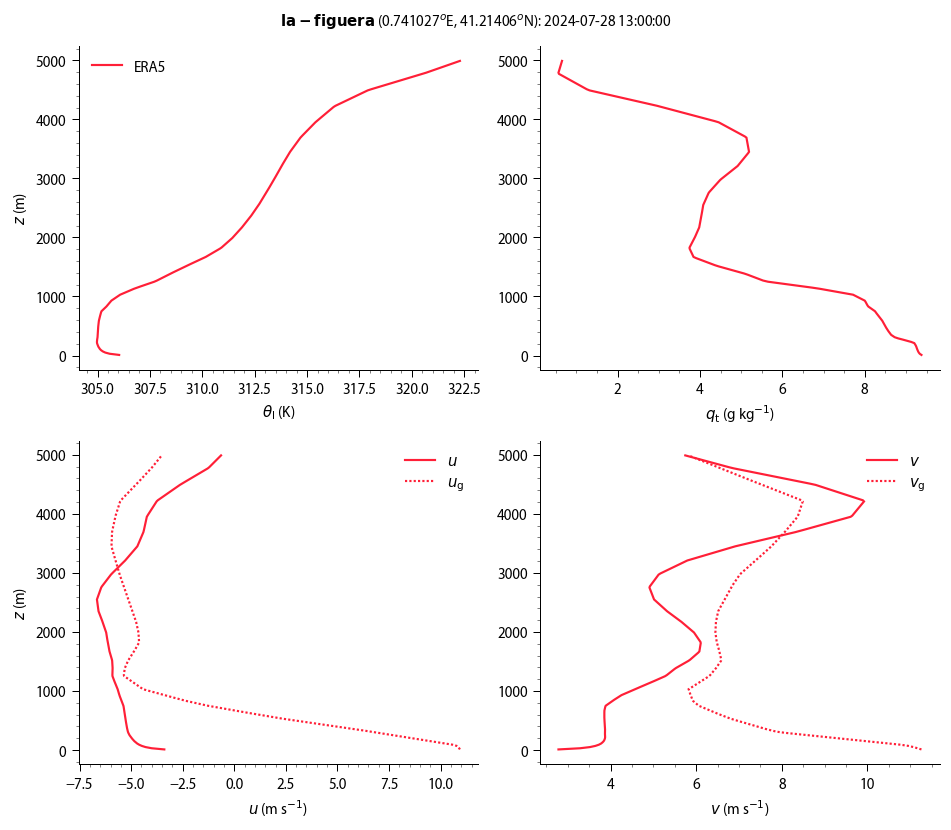

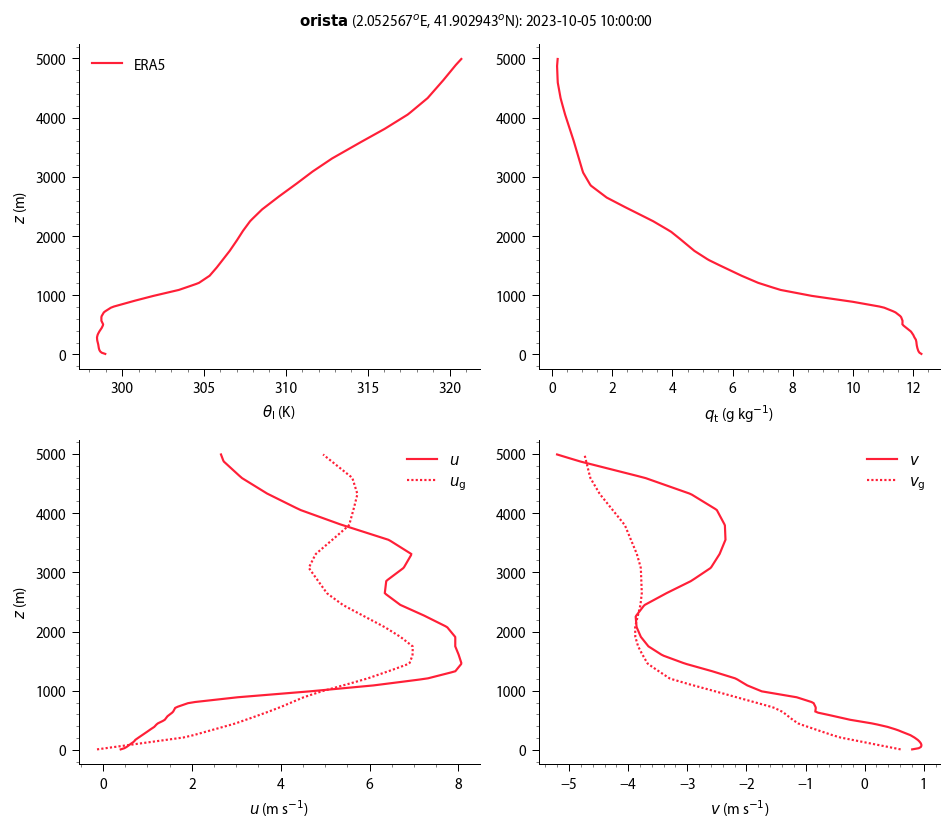

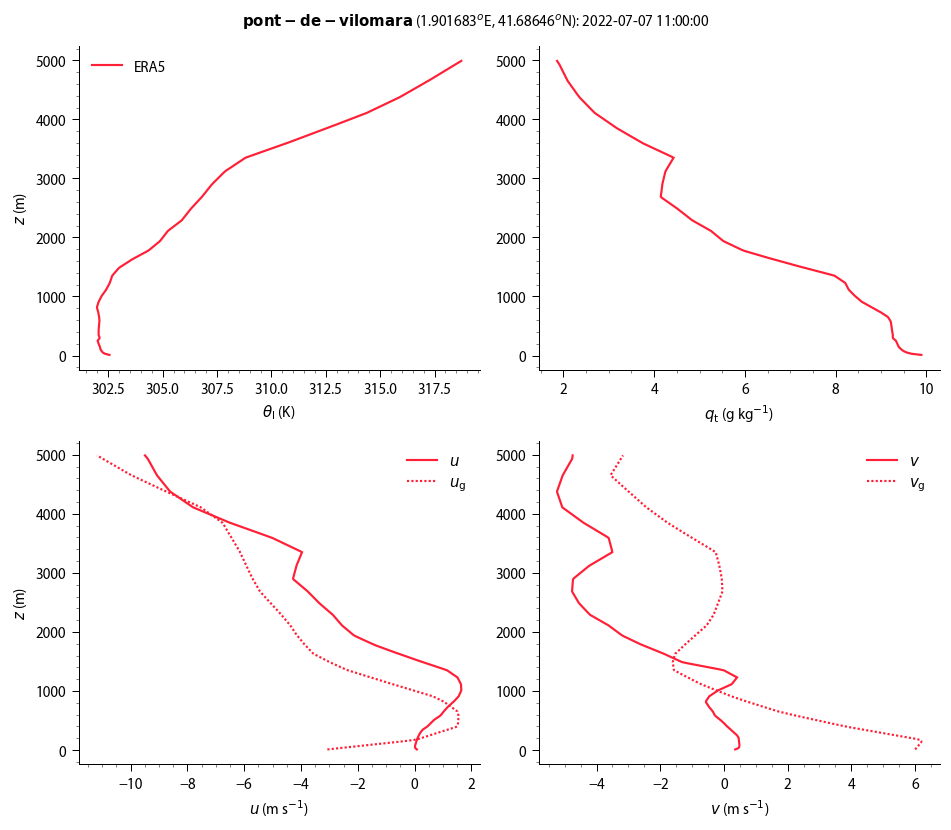

In [5]:
plt.close('all')

for name, case in cases.items():
    case.plot()